In [1]:
# 合成弹幕与MASK蒙版

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [3]:
# 读取照片
img = cv2.imread('./images/baby.jpg')
img_cvt = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

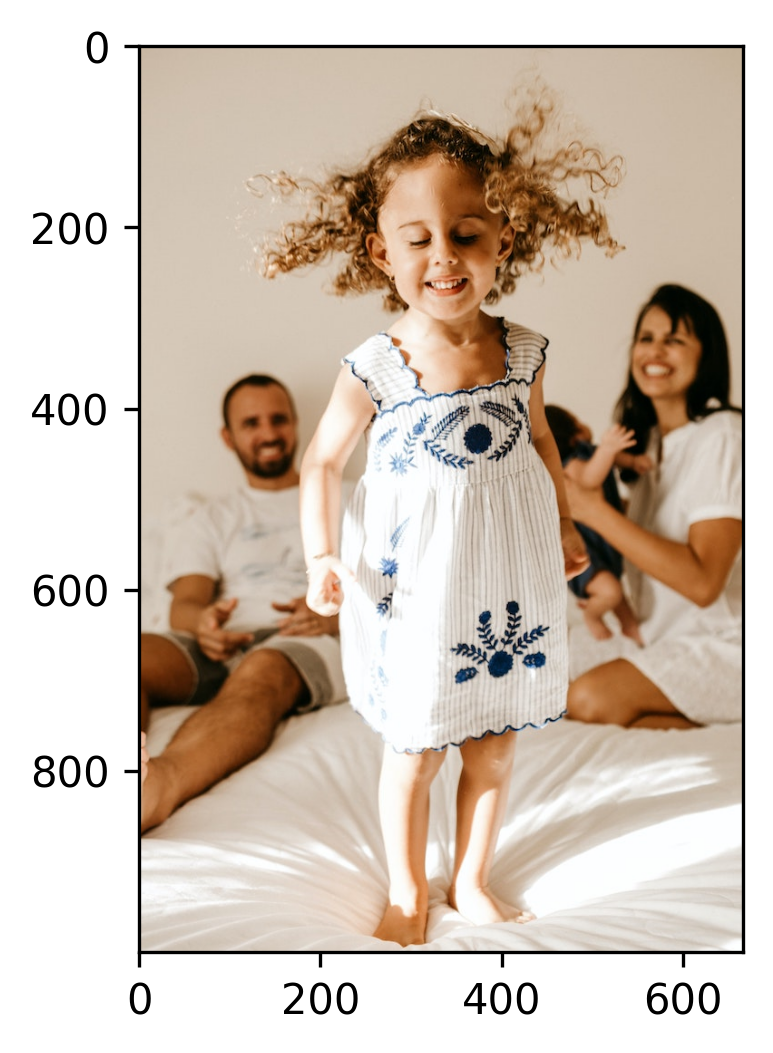

In [4]:
# 显示
plt.imshow(img_cvt)

In [5]:
# 获取MASK
import pixellib
from pixellib.instance import instance_segmentation

In [6]:
# 实例化
segment_frame = instance_segmentation()
segment_frame.load_model("weights/mask_rcnn_coco.h5")
# 选择类别
target_classes = segment_frame.select_target_classes(person = True)

Instructions for updating:
Use fn_output_signature instead


2022-03-02 17:08:26.831283: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-02 17:08:27.536609: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)


In [7]:
# 分割
results, output = segment_frame.segmentFrame( img, segment_target_classes = target_classes,show_bboxes = False )

/Users/zhaoenpei/miniconda3/envs/demo_py3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


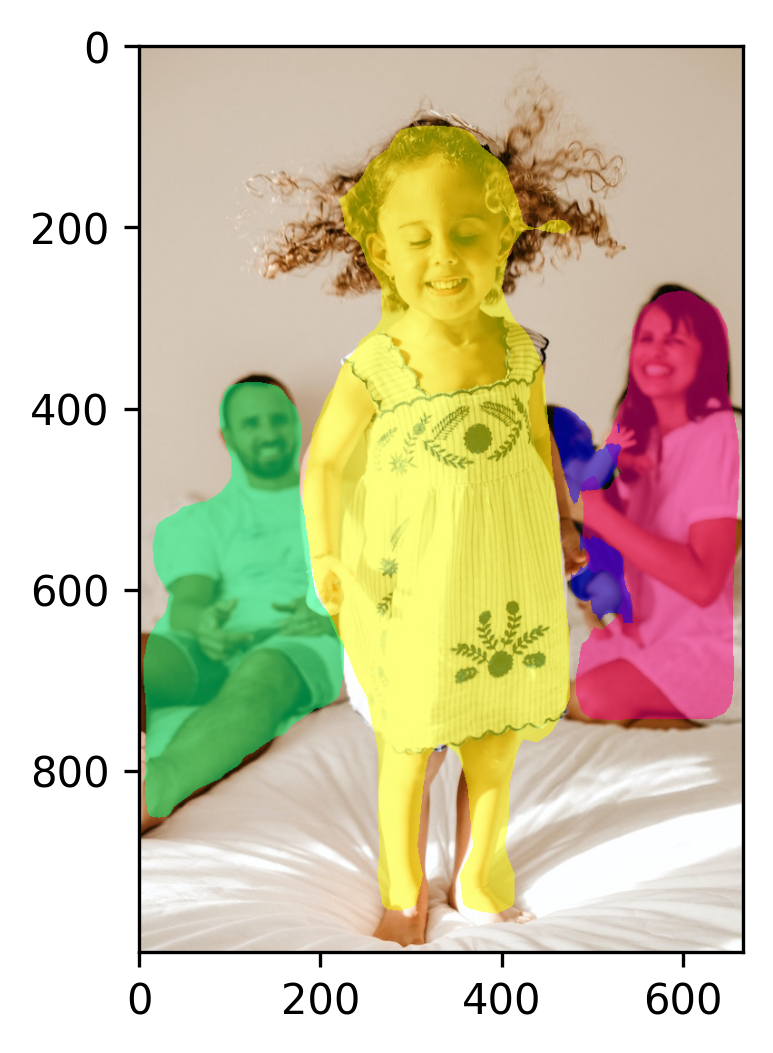

In [8]:
# 显示
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

In [9]:
# 查看蒙版
mask = results['masks']
print(mask.shape)

(1000, 667, 4)


In [10]:
# 人数
instance_num = len(results['class_ids'])

In [11]:
instance_num

4

In [12]:
# 拼接MASK
# 创建一个黑色背景图
mask_layer = np.zeros(output.shape[:2])

for index in range(instance_num) :
    # 使mask为TRUE位置变成白色
    mask_layer = np.where(mask[:,:,index] == True,255,mask_layer)


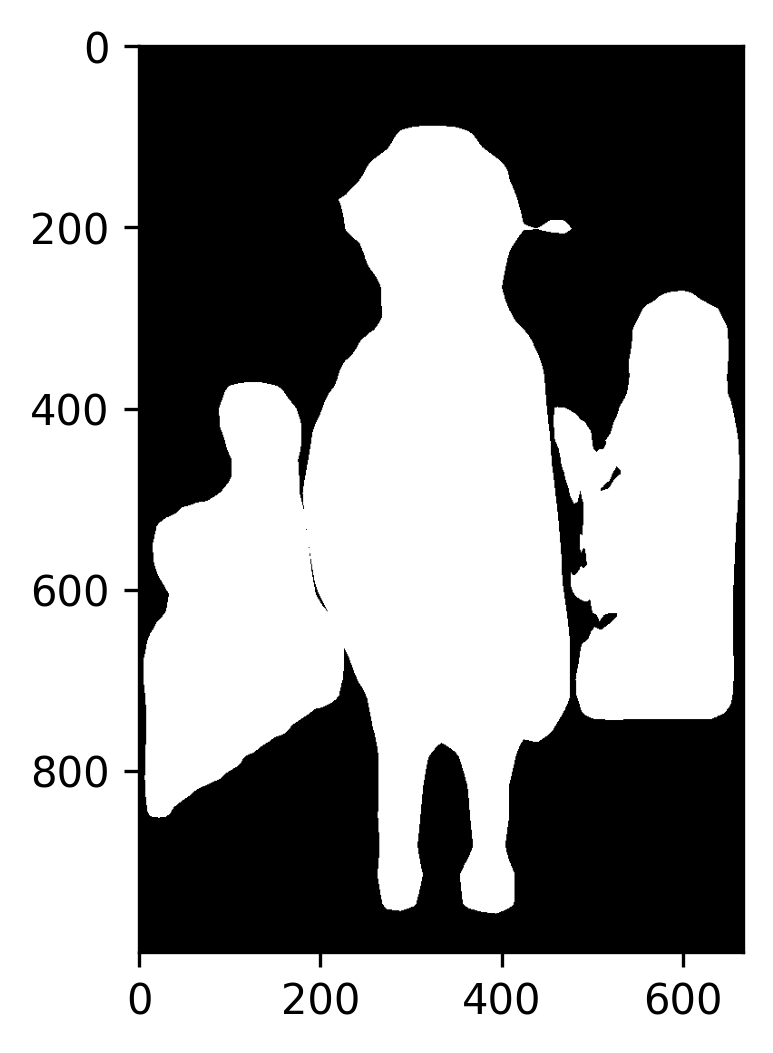

In [13]:
# 显示
plt.imshow(mask_layer,cmap="gray")

In [14]:
mask_layer.shape

(1000, 667)

In [15]:
# 导入PIL
from PIL import Image, ImageDraw, ImageFont

In [36]:
w,h = mask_layer.shape[1],mask_layer.shape[0]

# 构造透明图：https://rgbacolorpicker.com/

danmu_img = Image.new("RGBA", (w,h), (255, 255, 255, 0))

# 绘制
d = ImageDraw.Draw(danmu_img)

# 获取字体
fnt = ImageFont.truetype("./fonts/MSYH.ttc", 40, encoding="utf-8")

# 绘制字体
d.text((-130000, 100), "你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                    你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                    你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                    你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                    你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕                                     你好恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕 ", font=fnt, fill=(255, 0, 255, 255))

d.text((10, 200), "恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕", font=fnt, fill=(0, 255, 0, 255))

d.text((10, 300), "恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕", font=fnt, fill=(255, 0, 255, 255))

d.text((10, 400), "恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕", font=fnt, fill=(255, 0, 255, 255))

d.text((10, 500), "恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕，恩培，这个是字幕", font=fnt, fill=(255, 0, 255, 255))


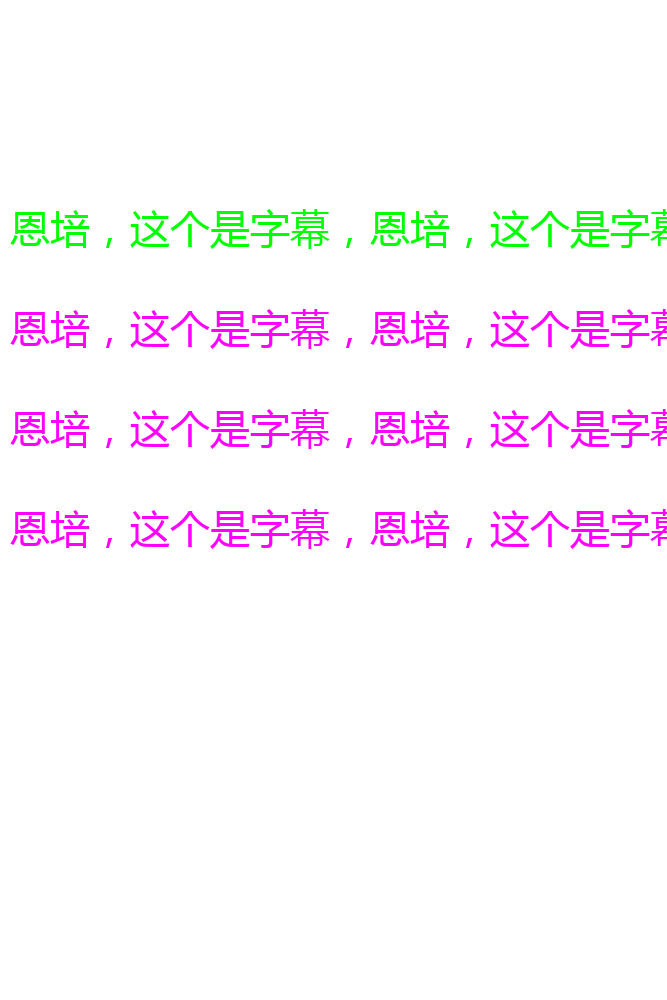

In [37]:
danmu_img

In [39]:
# 构造MASK区域

# 转为numpy格式数据好处理
danmu_np = np.asarray(danmu_img)


In [40]:
# 将弹幕与MASK图片进行对比
danmu_np[:,:,3] = np.where(mask_layer== 255,0,danmu_np[:,:,3])

In [41]:
# 转换回PIL格式
danmu_pil = Image.fromarray(danmu_np)

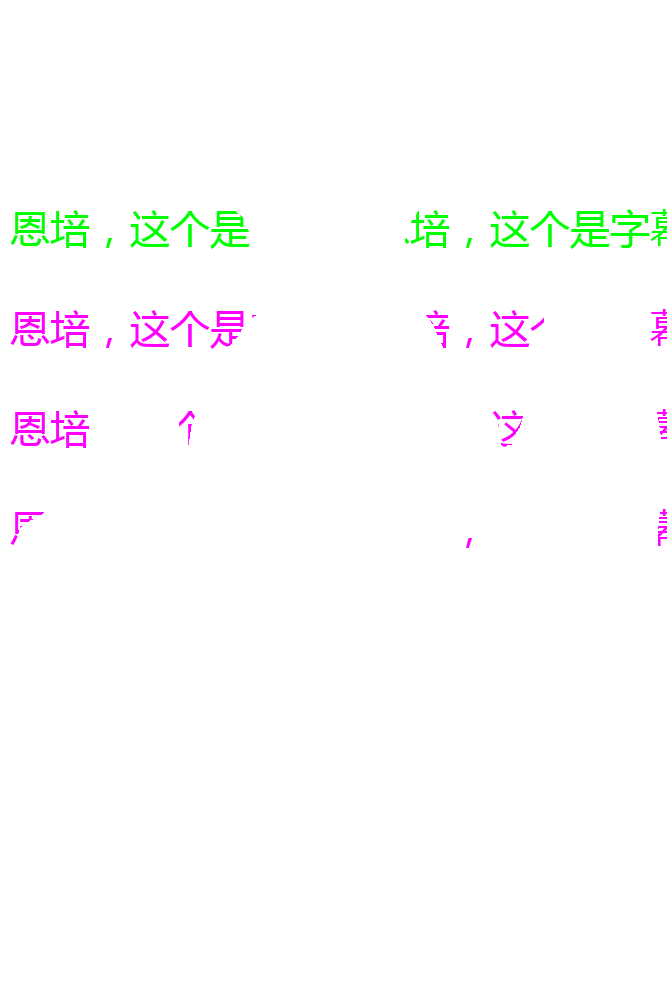

In [42]:
danmu_pil

In [22]:
# 拼接原视频与带MASK的代码

# 将底图转为RGBA格式
img_rgba = cv2.cvtColor(img_cvt,cv2.COLOR_RGB2RGBA)
# 转为PIL格式
img_rgba = Image.fromarray(img_rgba)


# 拼接图片
out = Image.alpha_composite(img_rgba, danmu_pil)

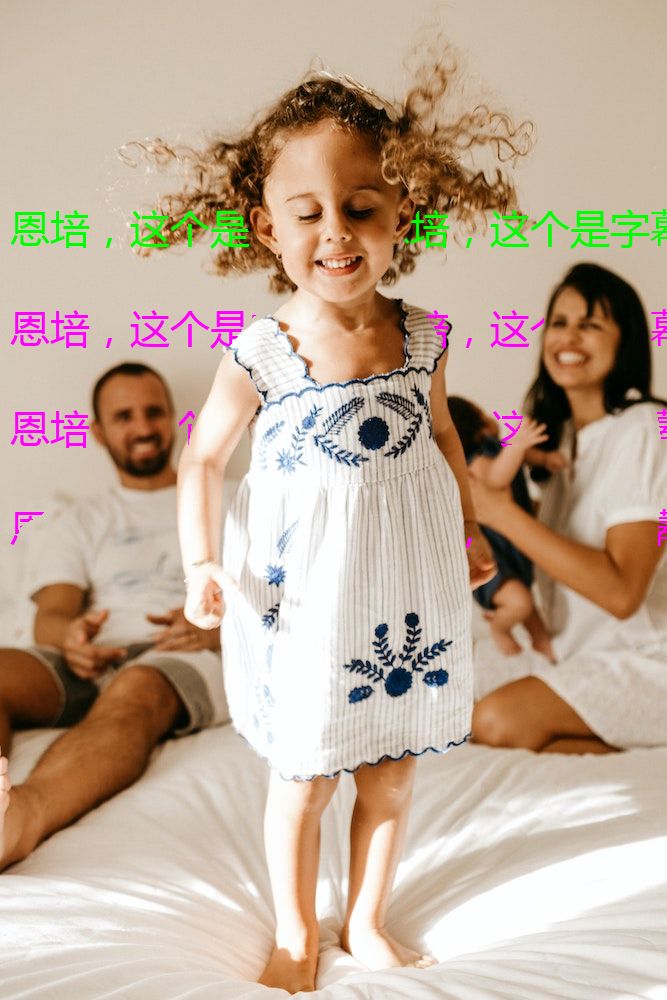

In [23]:
out